In [1]:
import pandas as pd
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    'Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates=['period_begin','period_end'],
    dtype={
        'total_homes_sold':'Int32',
        'region_name':'category'
    })
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [3]:
ca_housing = housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name = housing_raw['region_name'].str[0:-11])

In [5]:
ca_housing_pivot = ca_housing.pivot_table(
    index='period_begin',
    columns='region_name',
    values='median_active_list_price'
).loc[:,['Los Angeles','San Diego','San Francisco','Tulare']].assign(overall_avg = lambda x: x.mean(axis=1))

In [6]:
ca_housing_pivot.head()

region_name,Los Angeles,San Diego,San Francisco,Tulare,overall_avg
period_begin,,,,,
2017-01-02,611561.0,618570.8,1229018.7,225395.8,671136.575
2017-01-09,614061.0,621737.5,1233393.7,227729.1,674230.325
2017-01-16,617311.0,625820.8,1239977.0,229060.4,678042.300
2017-01-23,620644.3,629491.6,1247977.0,229806.2,681979.775
2017-01-30,624541.6,632824.0,1253310.4,230139.5,685203.875


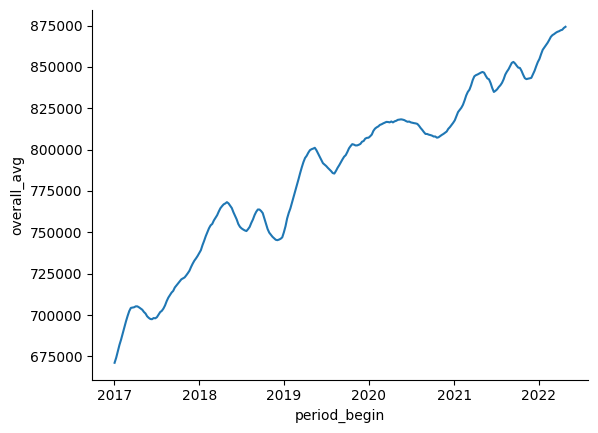

In [8]:
sns.lineplot(data=ca_housing_pivot, x=ca_housing_pivot.index, y='overall_avg')
sns.despine()

<Axes: xlabel='period_begin', ylabel='median_active_list_price'>

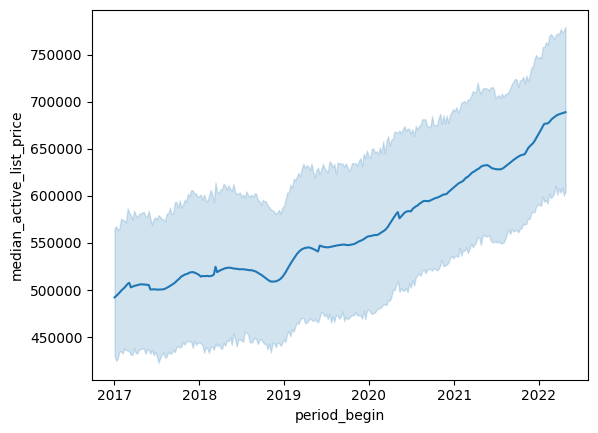

In [9]:
sns.lineplot(x='period_begin', y='median_active_list_price', data=ca_housing) # a margem azul claro é o desvio padrão.

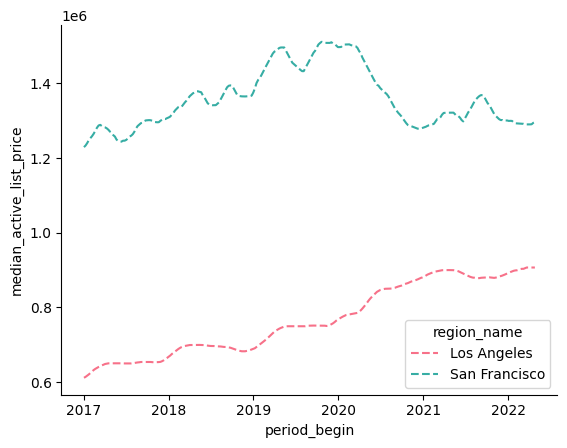

In [14]:
sns.lineplot(
    x='period_begin', 
    y='median_active_list_price', 
    data=ca_housing.query("region_name in ['Los Angeles','San Francisco']"),
    errorbar=None,
    hue='region_name',
    palette='husl',
    ls='--'
) 

sns.despine()